<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Tipoogia i Cicle de Vida de les Dades</p>
<p style="margin: 0; text-align:right;">2022-2 · Màster universitari en Ciència de dades (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# Pràctica 2: Com realitzar la neteja i l'anàlisi de les dades?


* [Descripció del dataset](#apt1)
* [Integració i selecció](#apt2)
* [Neteja de les dades](#apt3)
* [Anàlisi de les dades](#apt4)
* [Representació dels resultats](#apt5)
* [Resolució del problema](#apt6)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans

In [2]:
# Es llegeix el dataset
random_state = 24
df = pd.read_csv('../data/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<a id="apt1"></a>
## 1. Descripció del dataset

El dataset escollit es pot trobar a l'adreça:
https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
S'ha escollit aquest dataset ja que és el set de dades proposat i és un bon exemple de dades mèdiques, en les quals es poden veure característiques dels pacients de la mostra, des de l'edat i el sexe fins a nivells de colesterol, ritme cardíac, tipus de dolor al pit que tenien... que poden ser bones característiques de cara a classificar, o fins i tot arribar a predir, segons aquestes característiques, quins pacients podrien arribar a tenir un atac de cor.
Tanmateix, amb aquesta mostra de la població del dataset, es podrien arribar a extreure algunes conclusions tals com si el gènere i l'edat, així com els nivells de colesterol, per exemple, poden ser factors que contribueixin al fet de tenir un atac de cor.

<a id="apt2"></a>
## 2. Integració i selecció

Integració i selecció de les dades d’interès a analitzar. Pot ser el resultat
d’addicionar diferents datasets o una subselecció útil de les dades originals, en
base a l’objectiu que es vulgui aconseguir.

### Tipus de variables

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Veiem els tipus de dades de cada columna, així com el seu nombre de registres

### Estadístics bàsics

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Podem veure alguns estadístics bàsics de cadascuna de les columnes.

A priori totes les columnes ens poden ser d'interès així que no eliminem cap columna. No s'han hagut de fer tasques de neteja de les dades ja que aquestes ja presentaven una bona qualitat (no hi ha nuls ni valors que falten, no s'han de canviar els tipus de les dades...).

Els atributs que tenim són:
- **age**: L'edat del pacient de la mostra.
- **sex**: El sexe del pacient de la mostra.
- **cp**: Tipus de dolor al pit, 1- Angina típica, 2- Angina atípica, 3- Dolor no d'angina, 4- Asimptomàtic.
- **trtbps**: Pressió de la sang en estat de descans (en mm Hg).
- **chol**: Nivel de colesterol captat mitjançant un sensor BMI, en mg/dl.
- **fbs**: Fasting blood sugar, si és major de 120mg/dl té el valor d'1. Si no ho és, de 0.
- **restecg**: Resultats de l'electrocardiogràfic en estat de repòs. 0- Valor normal, 1- Té l'abnormalitat d'ona ST-T, 2- Mostra hipertròfia ventricular al ventricle esquerra segons el criteri d'Estes.
- **thalachh**: Màxim ritme cardíac.
- **exng**: Angina de pit induida per exercici, 1- Sí, 2-No.
- **oldpeak**: Valor de la depressió en el segment ST d'un electrocardiograma.
- **slp**: La pendent del pic al segment ST de l'electrocardiograma, 0- pendent cap avall, 1- plana, 2- pendent cap amunt.
- **caa**: Nombre de vasos sanguinis majors colorejats per la fluoroscòpia (de 0 a 3).
- **thall**: Thalassemia, desordre a la sang, 1- presente el defecte, 2- normal, 3- defecte reversible.
- **output**: Possibilitat d'un atac de cor, 0- Menor possibilitat, 1- Major possibilitat.

In [5]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

Es poden veure el nombre de valors únics de cadascun dels atributs mitjançant `nunique()`

In [6]:
# Es divideixen els atributs entre els que són numèrics i categòrics
cols_numerical = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
cols_categorical = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

Si s'observa el conjunt de dades es pot arribar a la conclusió de quines variables són continues i quines variables són categòriques.
Les variables numèriques que conformen el conjunt de dades son: `age`, `trtbps`, `chol`, `thalachh` i `oldpeak`.
Les variables categòriques son: `sex`, `cp`, `fbs`, `restecg`, `exng`, `slp`, `caa`, `thall` i `output`.

<a id="apt3"></a>

## 3. Neteja de les dades

En aquest apartat es gestionen els valors nuls, buits i els outliers.

### Valors nuls

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Es comprova que realment no hi ha registres nulls a cap columna.

### NaN values

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Es comprova que tampoc hi han NaN.

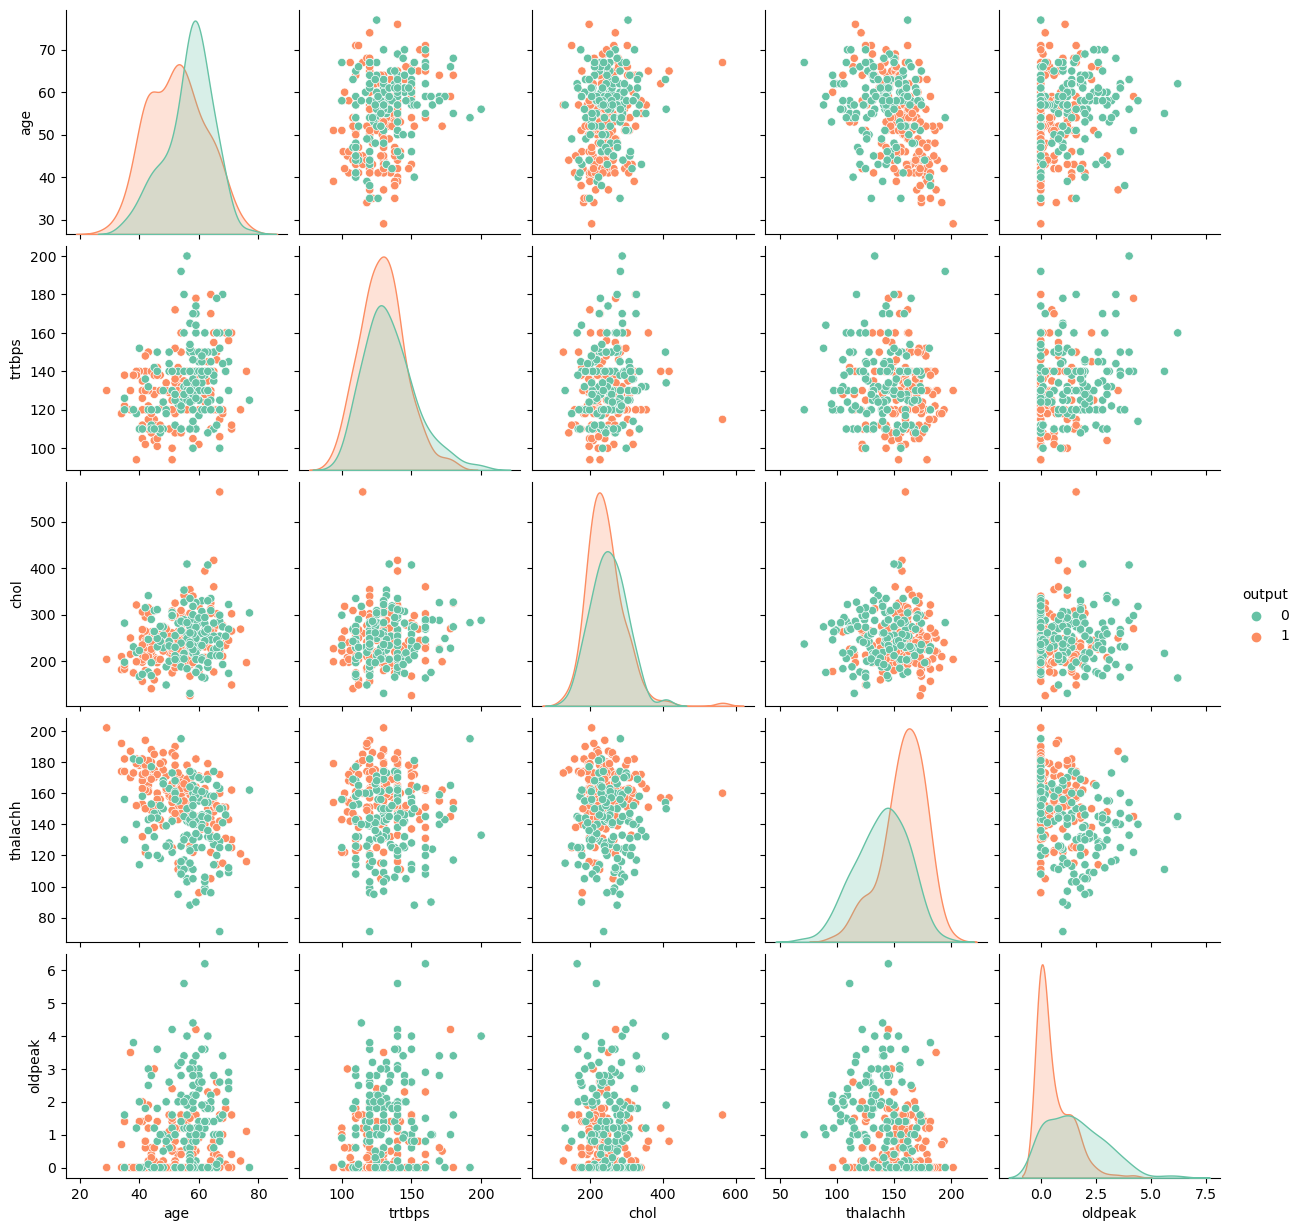

In [9]:
## REPASSAR EL KDE ABANS I DESPRÉS DE TRACTAR ELS OUTLIERS, CANVIADA LA MANERA DE TREURE OUTLIERS,
# ES TREUEN ELS VALORS QUE SUPERIN 3 COPS LA DESVIACIÓ ESTÀNDARD DE LA MITJANA.
# UNA VEGADA FET, ELIMINAR AQUESTA CEL·LA, PERÒ DEIXAR
## cols_num_out = cols_numerical.copy() i cols_num_out.append('output')

cols_num_out = cols_numerical.copy()
cols_num_out.append('output')
df_numeric = df.loc[:, cols_num_out]
sns.pairplot(df_numeric, diag_kind = "kde", hue = "output", palette = "Set2")
plt.show()

### Valors extrems 

Es creen uns boxplots per a veure si hi ha valors extrems

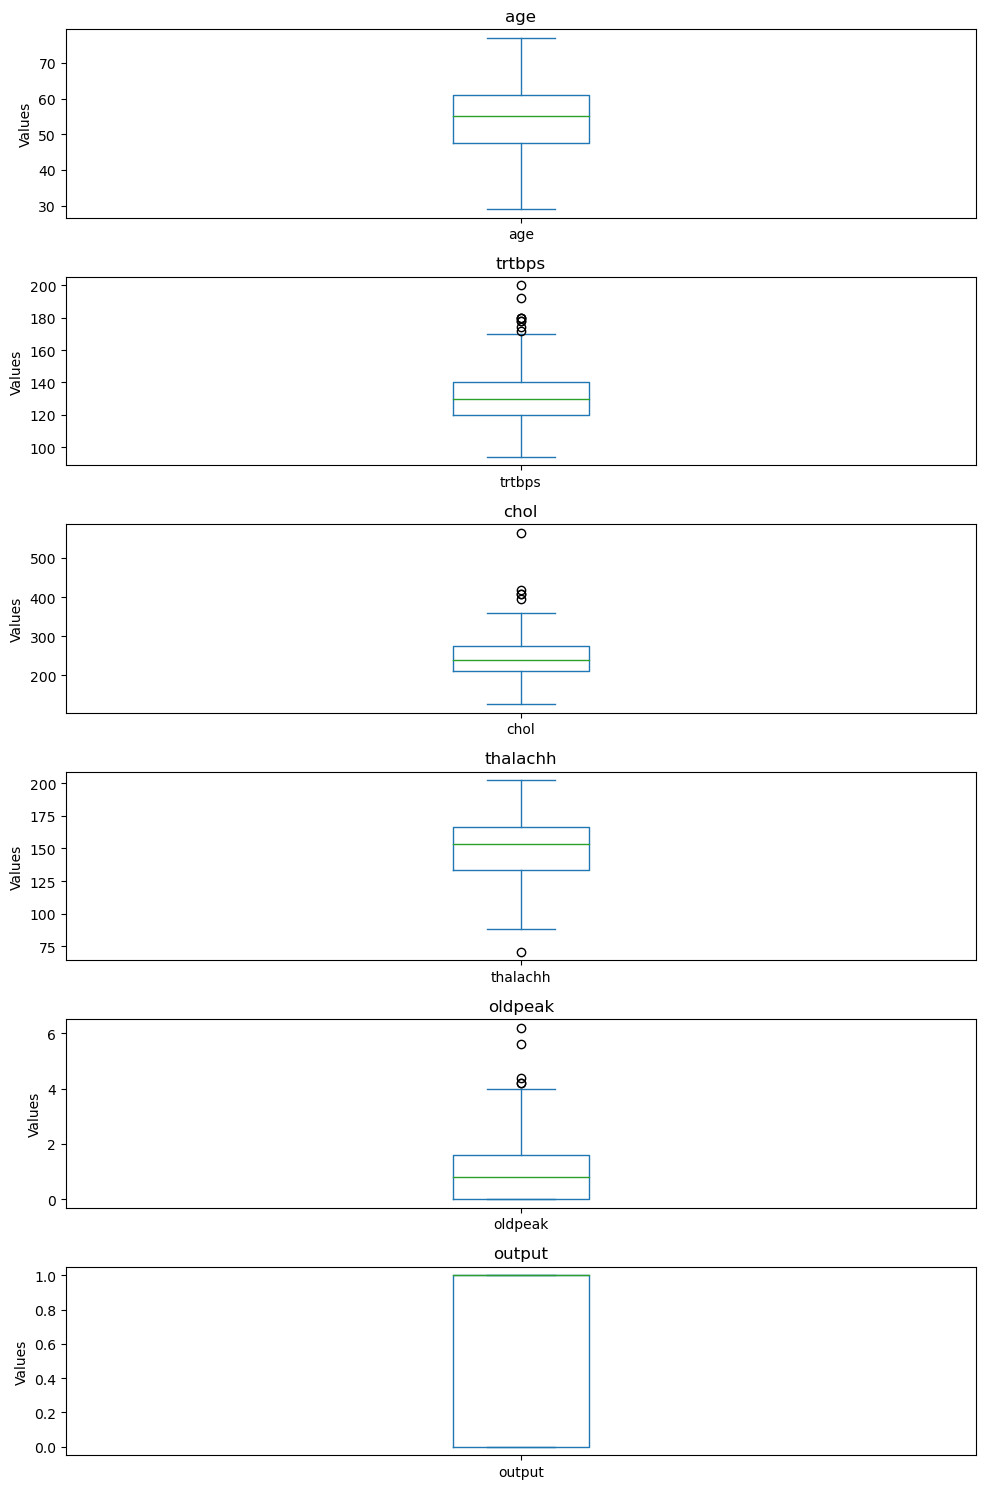

In [10]:
fig, axs = plt.subplots(len(cols_num_out), figsize=(10, 15))

for i, column in enumerate(cols_num_out):
    df[column].plot(kind='box', ax=axs[i])  

    axs[i].set_title(f'{column}')
    axs[i].set_ylabel('Values')
    
plt.tight_layout()
plt.show()

Es pot apreciar que hi ha outliers a trtbps, chol, thalachh i a oldpeak.

In [11]:
# Es treuen els outliers pels valors que superin 3 cops la desviació
# estàndard a la seva mitjana

cols_outliers = ['trtbps', 'chol', 'thalachh', 'oldpeak']
threshold = 3

for column in cols_outliers:
    col_mean = df[column].mean()
    col_std = df[column].std()
    
    upper_threshold = col_mean + threshold * col_std
    lower_threshold = col_mean - threshold * col_std
    
    outliers = (df[column] > upper_threshold) | (df[column] < lower_threshold)
    df.loc[outliers, column] = np.nan

df.dropna(axis=0, inplace=True)

En aquest procés, s'ha passat de 303 a 294 registres, se n'han eliminat 4 del dataset. Anem a comprovar com queden els boxplot després de treure els outliers.

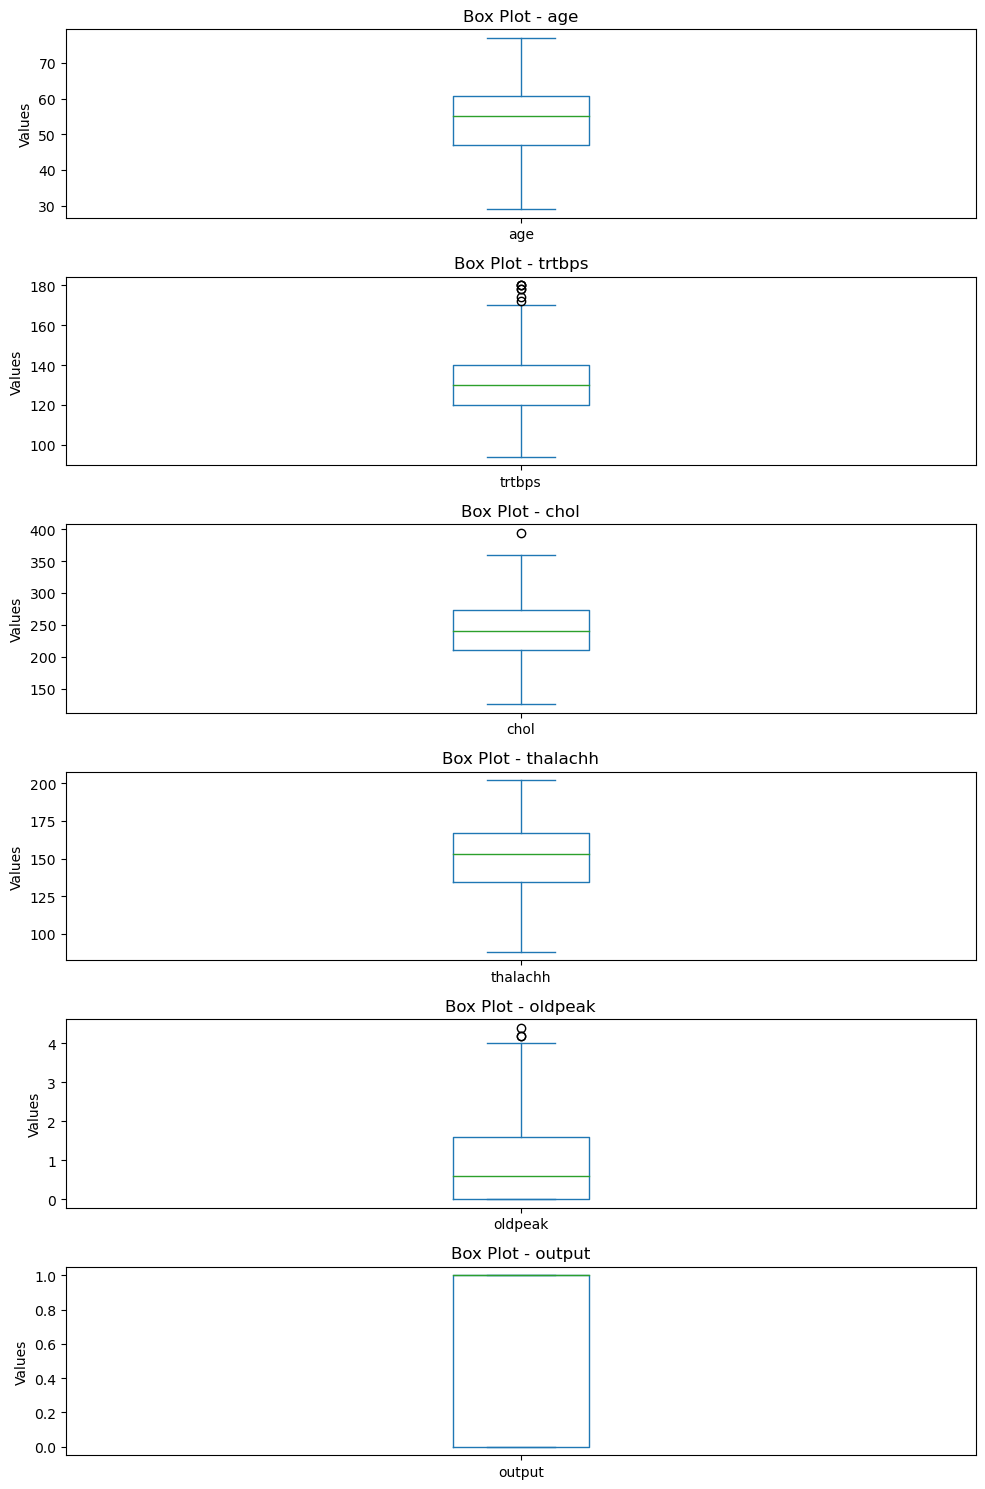

In [12]:
fig, axs = plt.subplots(len(cols_num_out), figsize=(10, 15))

for i, column in enumerate(cols_num_out):
    df[column].plot(kind='box', ax=axs[i])  

    axs[i].set_title(f'Box Plot - {column}')
    axs[i].set_ylabel('Values')
    
plt.tight_layout()
plt.show()

Es pot comprovar que encara hi ha algun valor superior al tercer quartil, però es deixaran, ja que no hi ha moltes mostres i aquestes respecten la regla que hem fet servir anteriorment per a eliminar valors extrems.

<a id="apt4"></a>

## 4. Anàlisi de les dades

Es fa una visualització de kernel density estimate (kde) per a veure la distribució de les variables numèriques.

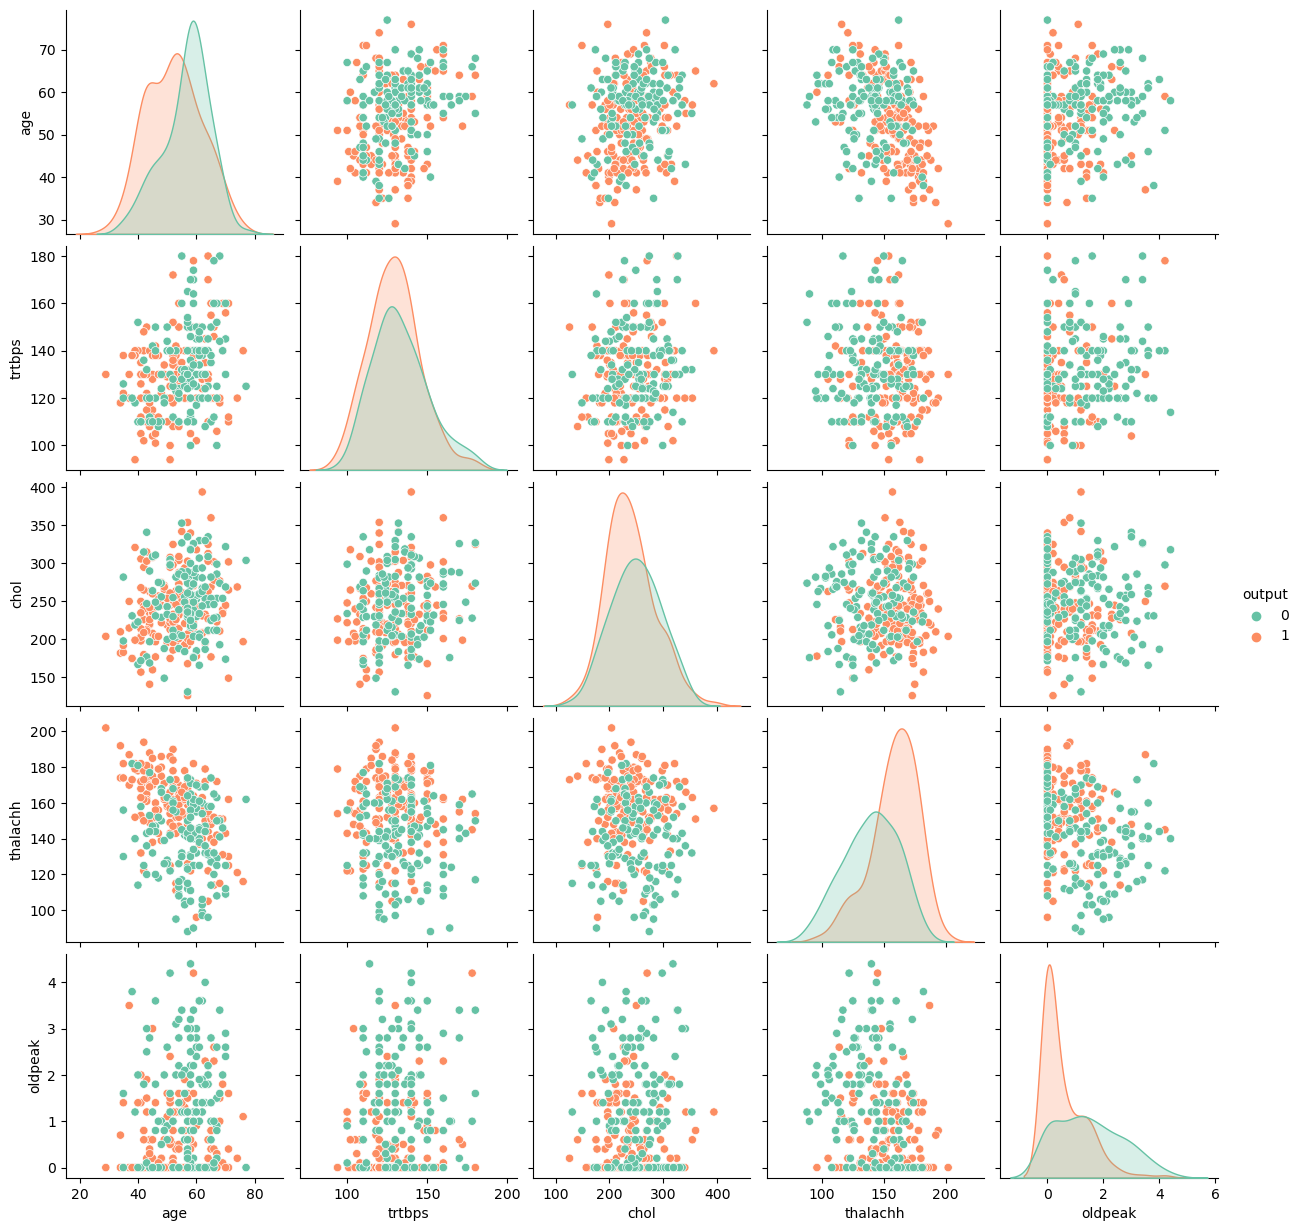

In [13]:
df_numeric = df.loc[:, cols_num_out]
sns.pairplot(df_numeric, diag_kind = "kde", hue = "output", palette = "Set2")
plt.show()

Es creen histogrames per a veure la distribució de les variables numèriques

Distribució de age:


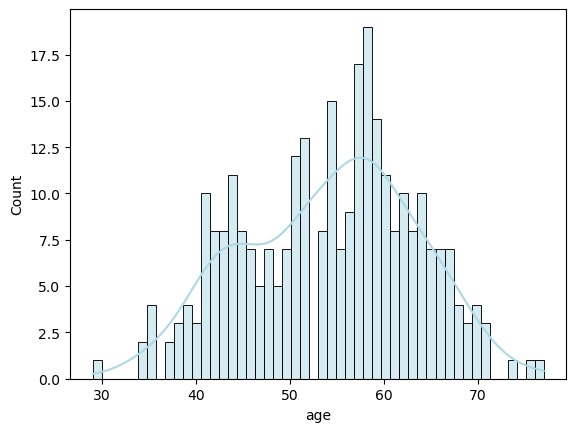

Distribució de trtbps:


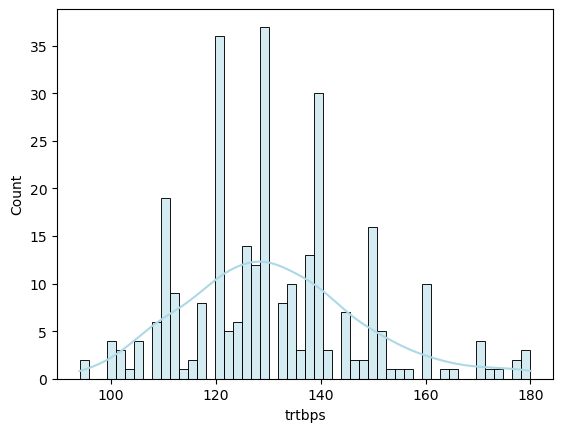

Distribució de chol:


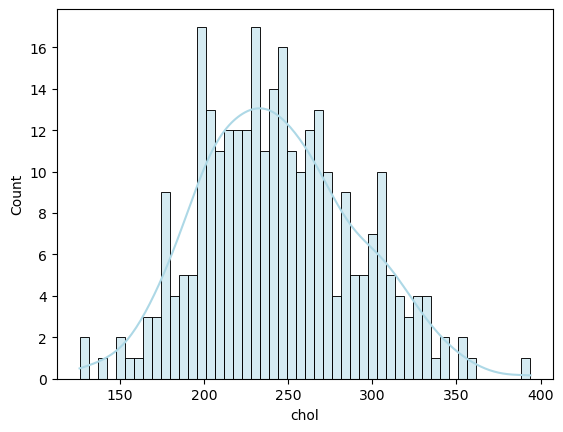

Distribució de thalachh:


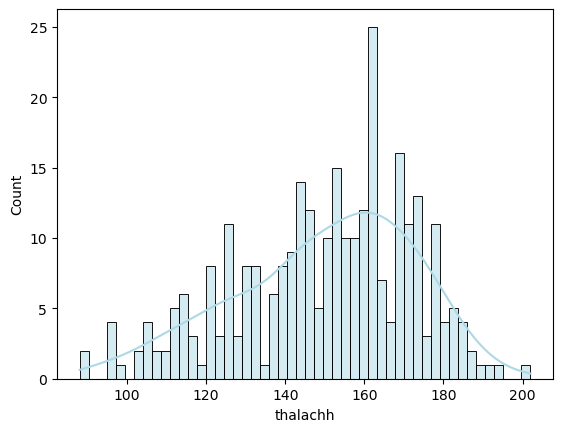

Distribució de oldpeak:


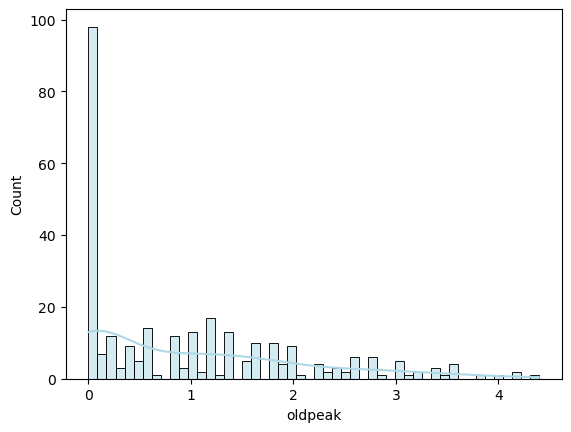

Distribució de output:


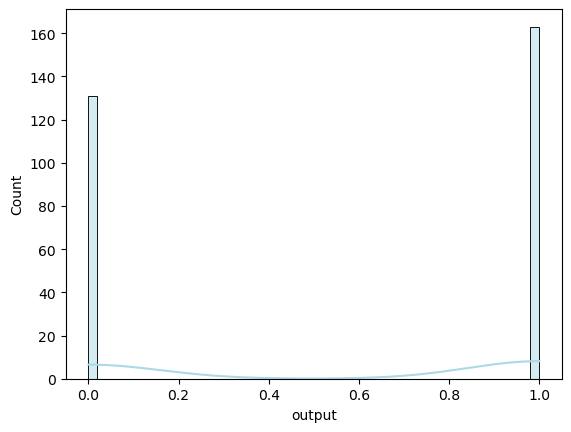

In [14]:
for cols in cols_num_out:
    sns.histplot(data = df, x = cols, bins = 50, kde = True, color = "lightblue", edgecolor = "black")
    print("Distribució de {}:".format(cols))
    plt.show()

Es visualitzen les variables categòriques:

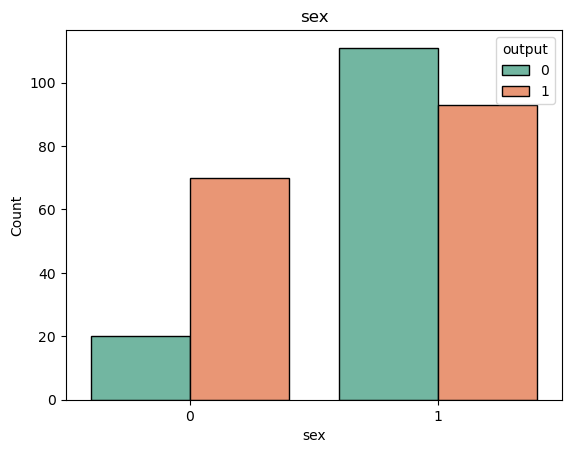

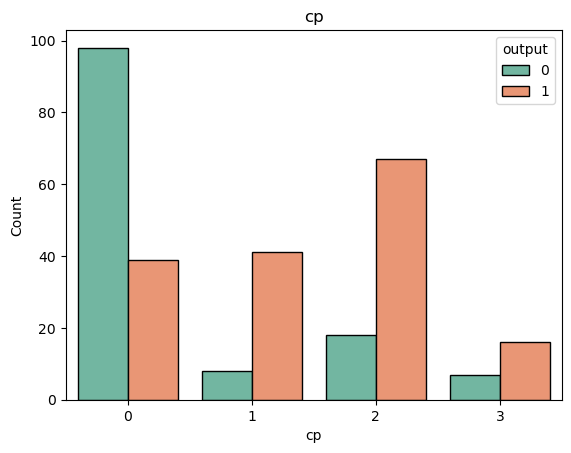

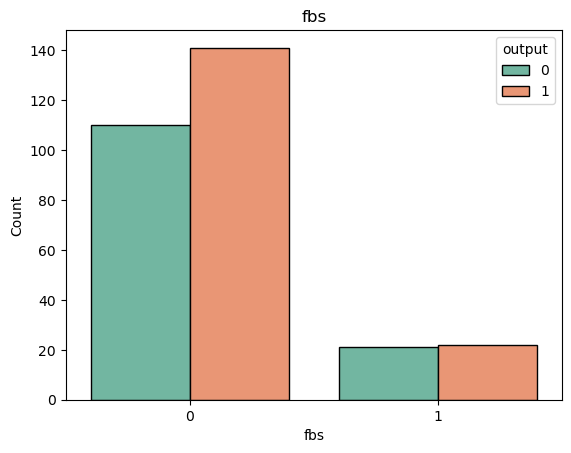

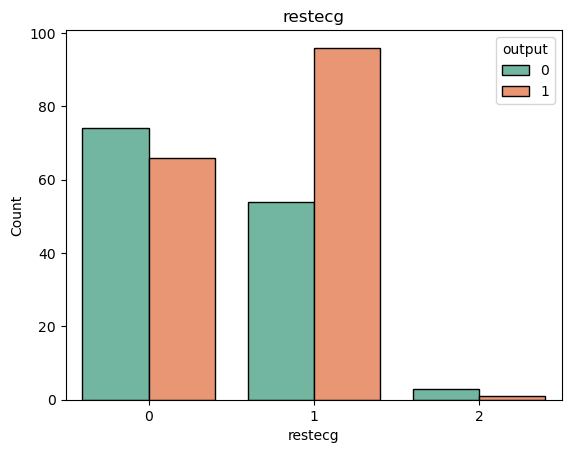

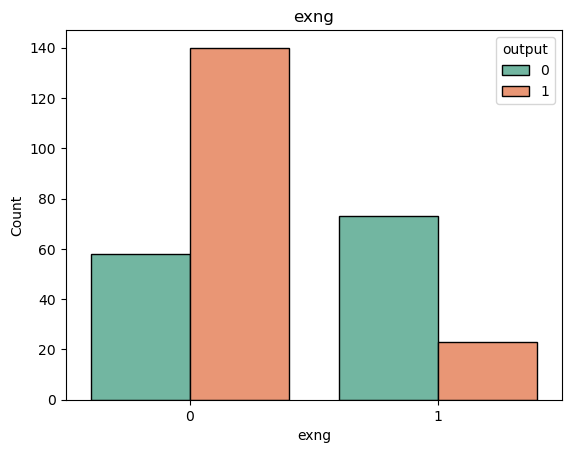

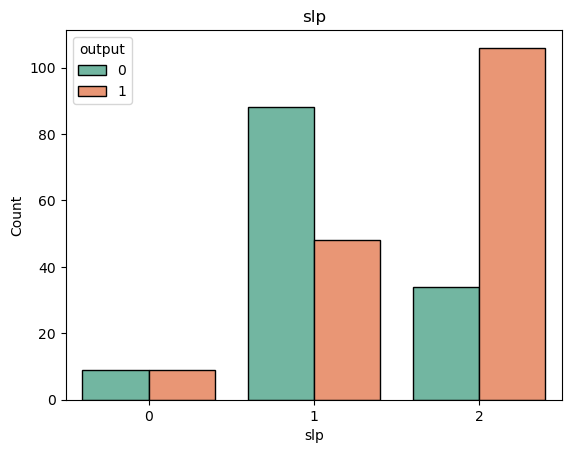

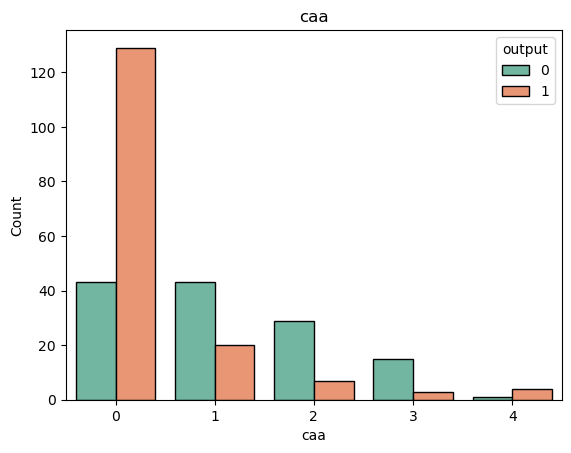

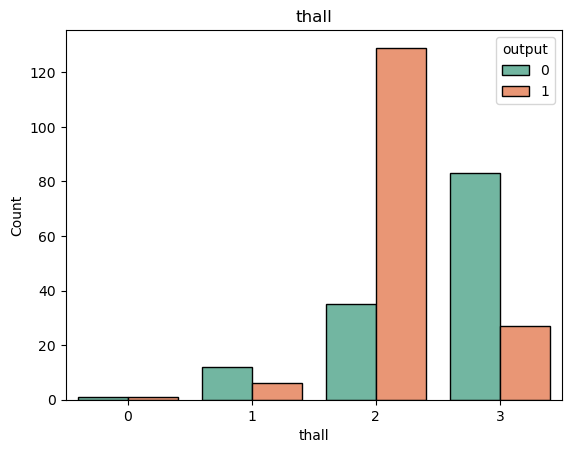

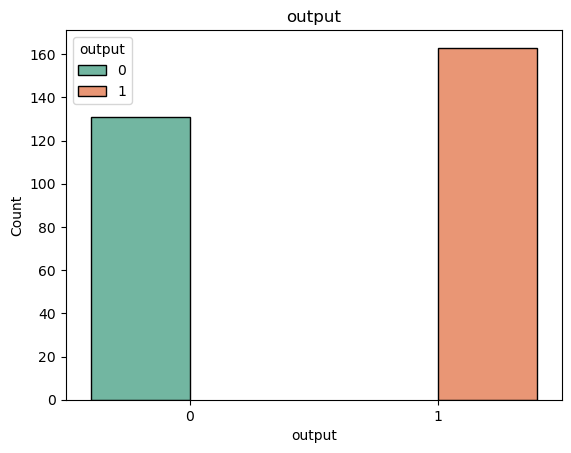

In [15]:
for cols in cols_categorical:
    fig, ax = plt.subplots()
    sns.countplot(ax = ax, data = df, hue = "output", x = df[cols], edgecolor = "Black", palette = "Set2")
    ax.set(ylabel='Count', title=cols)



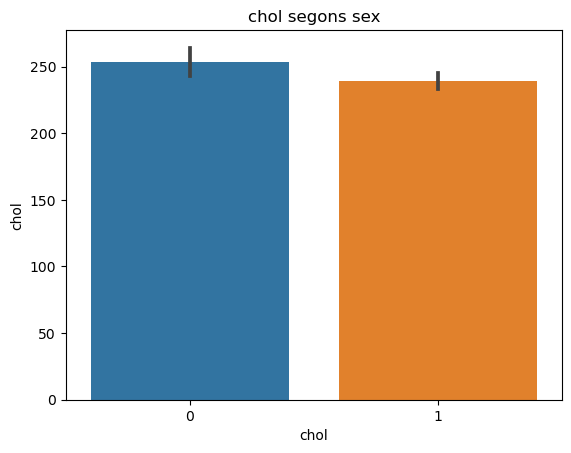

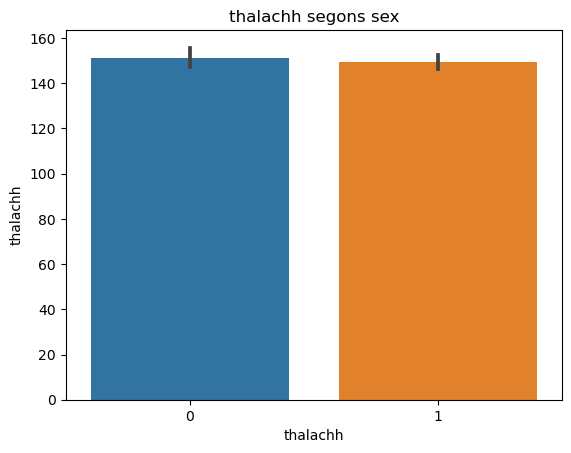

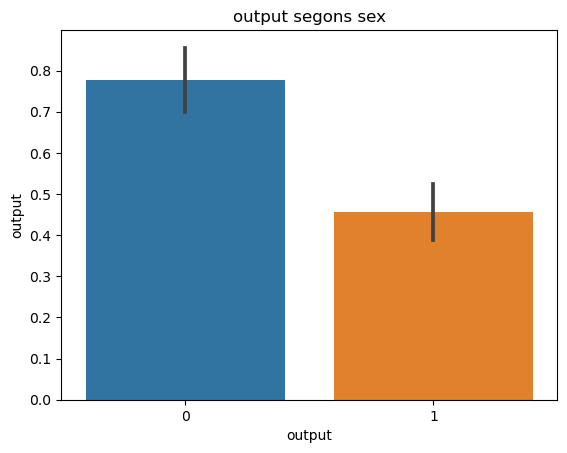

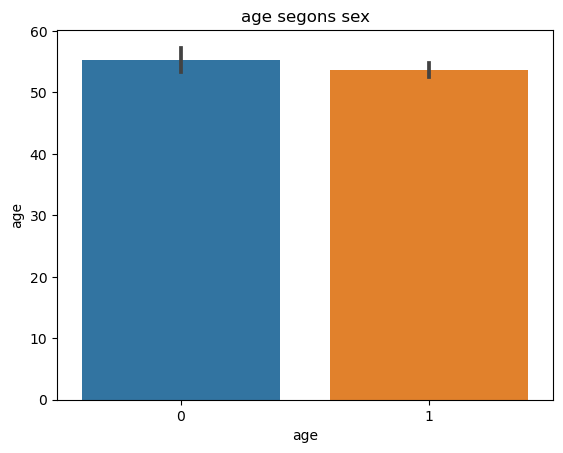

In [16]:
## No acabo de veure si aporta valor aquestes visualitzacions
for cols in ['chol', 'thalachh', 'output', 'age']:
    sns.barplot(y = cols, x = 'sex', data = df)
    plt.title(f"{cols} segons sex")
    plt.xlabel(cols)
    plt.show()

### Correlació de les variables

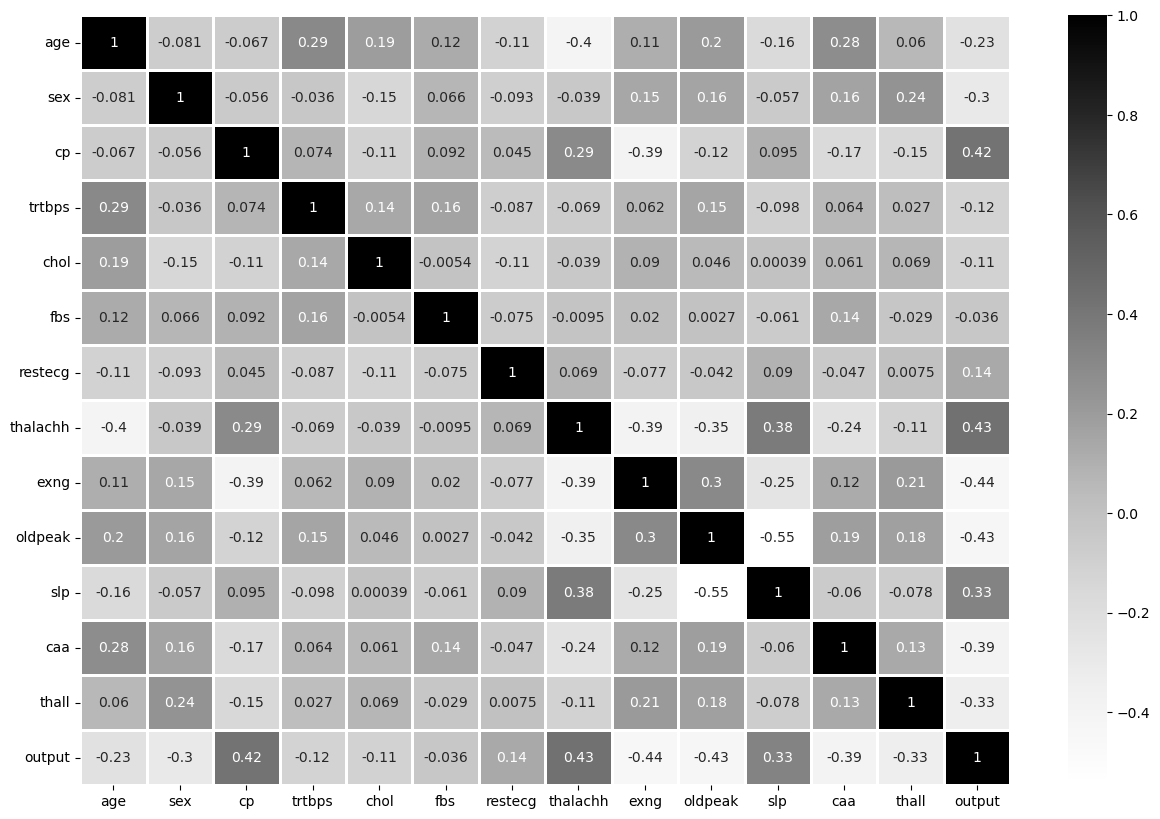

In [17]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap="Greys", linewidth = 1)
plt.show()

En la taula de correlacio de les variables es poden veure les relacions que hi han entre les variables independents i la variable objectiu. Per una visualització més acurada, s'analitzaran els casos més rellevants: TODO

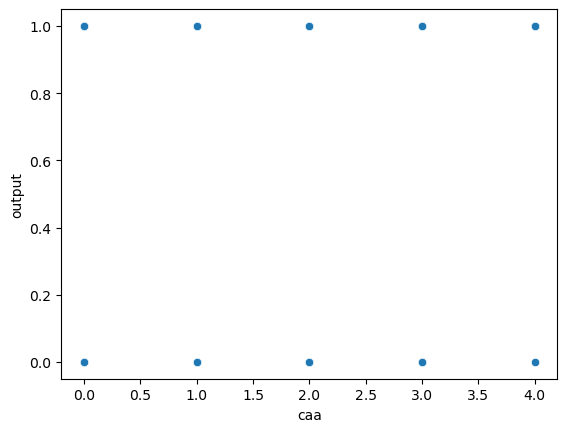

In [31]:
sns.scatterplot(x="caa", y="output", data=df);

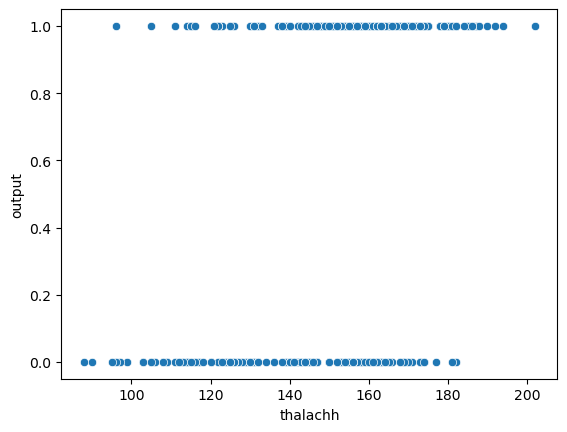

In [29]:
sns.scatterplot(x="thalachh", y="output", data=df);

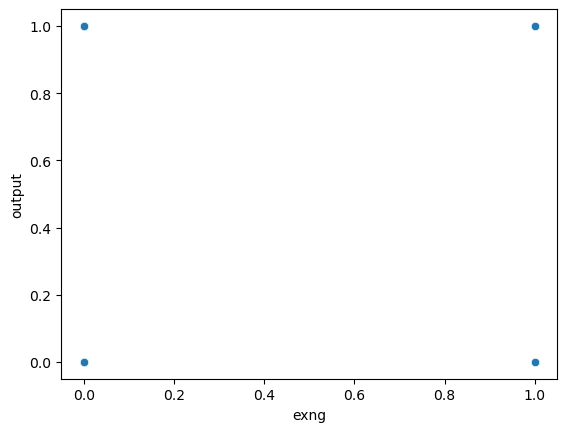

In [30]:
sns.scatterplot(x="exng", y="output", data=df);

### Anàlisi de la normalitat

Anem a veure el q-q plot i el seu histograma per a veure si els atributs poden ser candidats a la normalització:

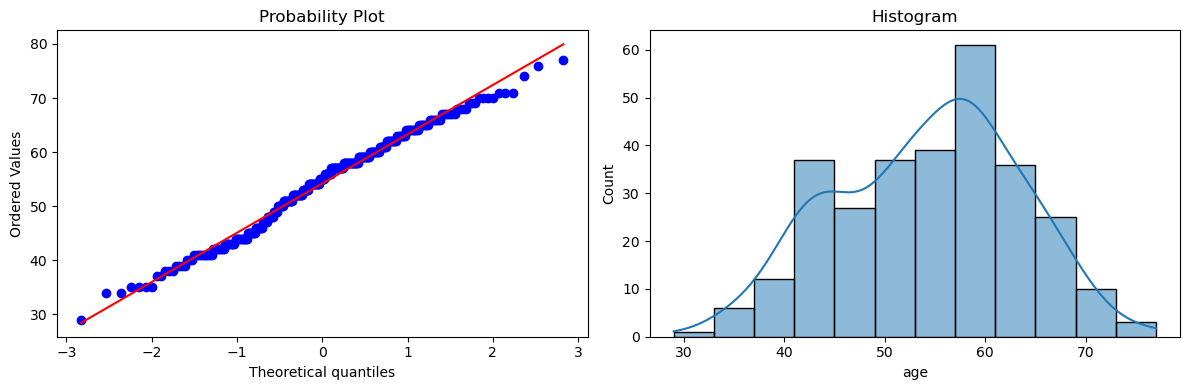

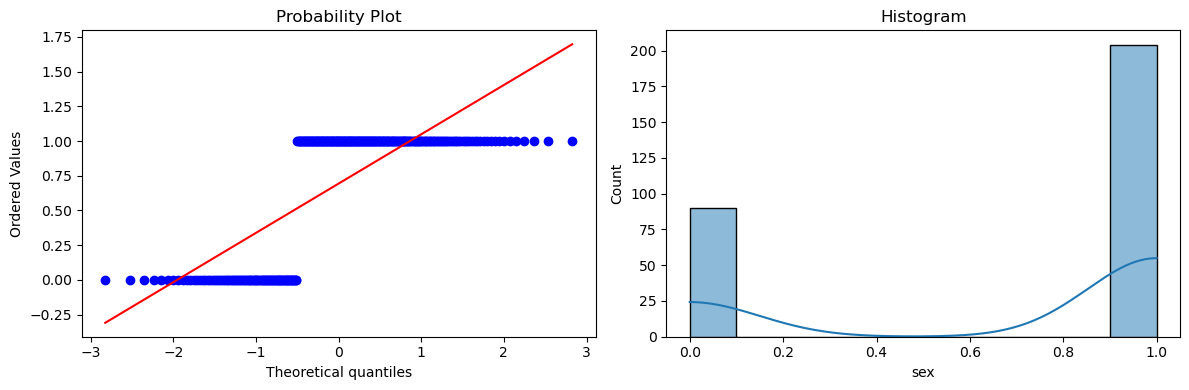

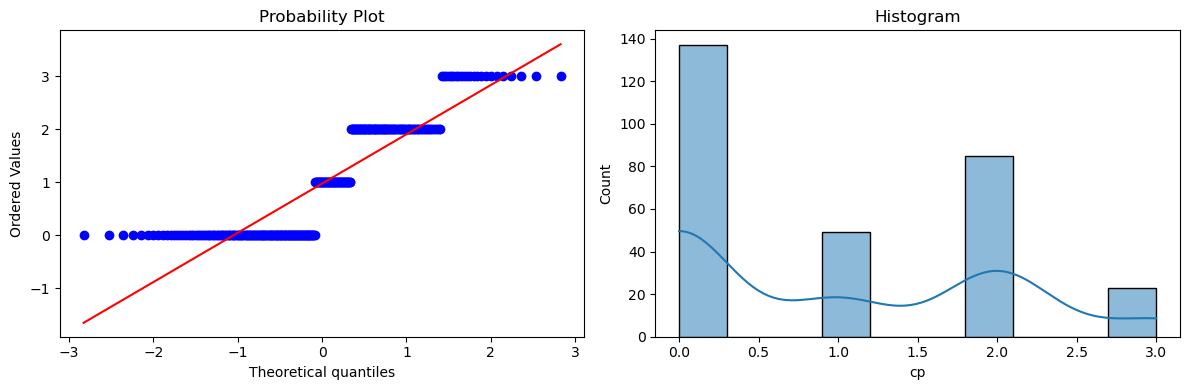

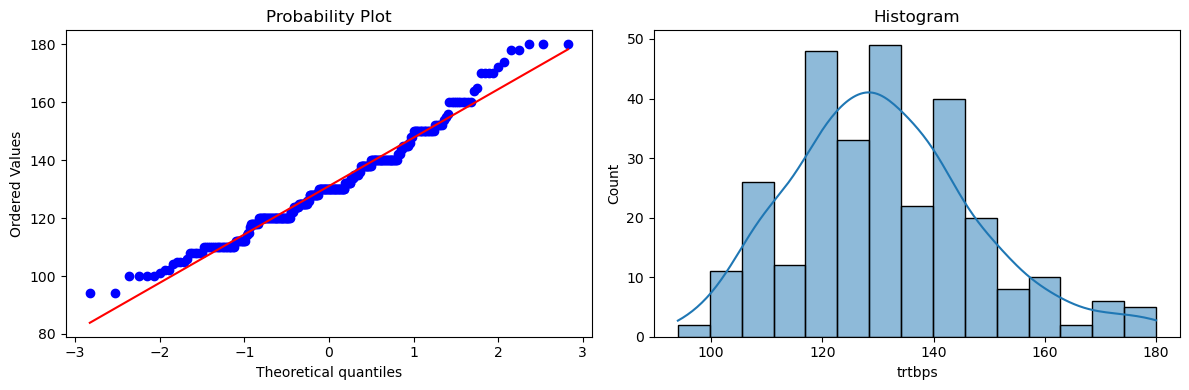

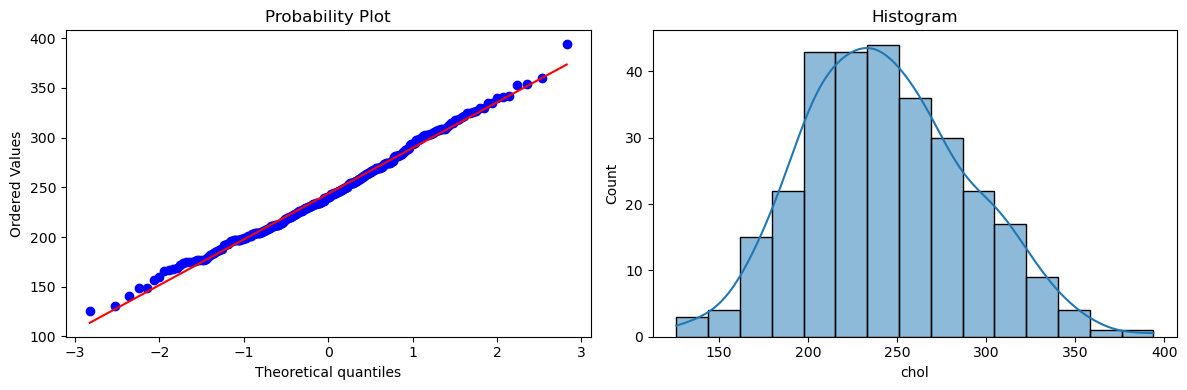

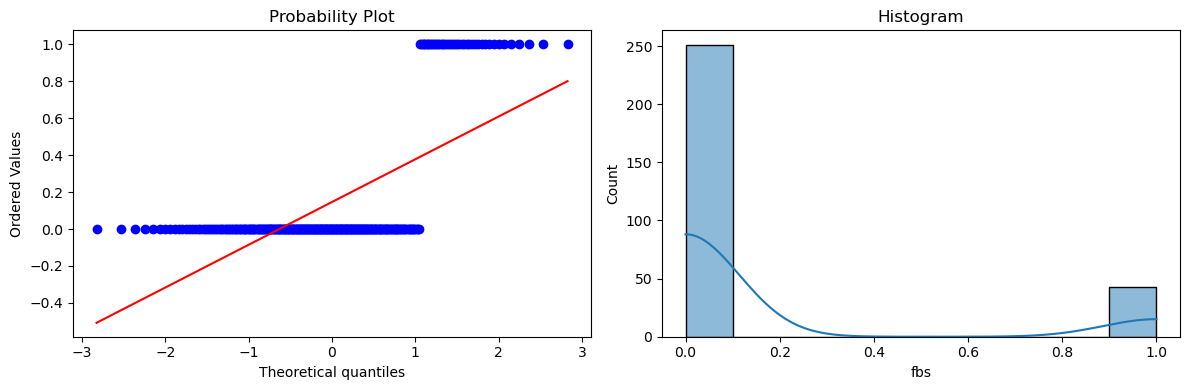

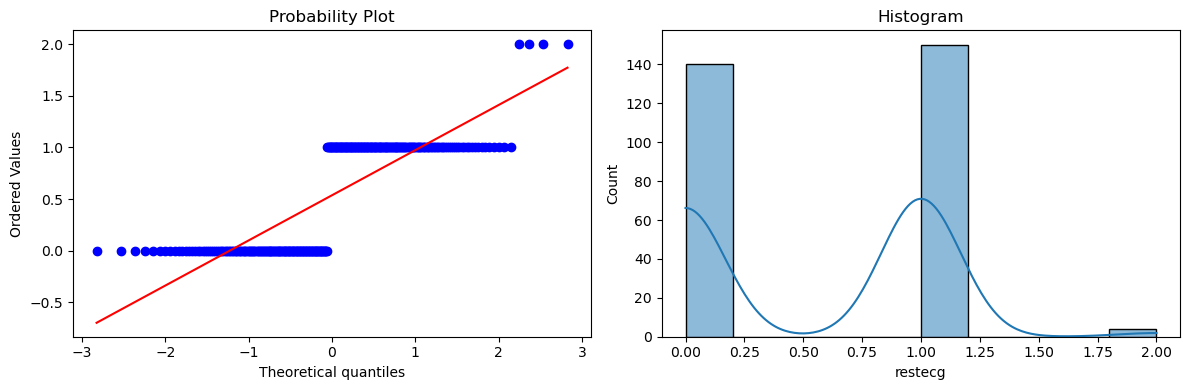

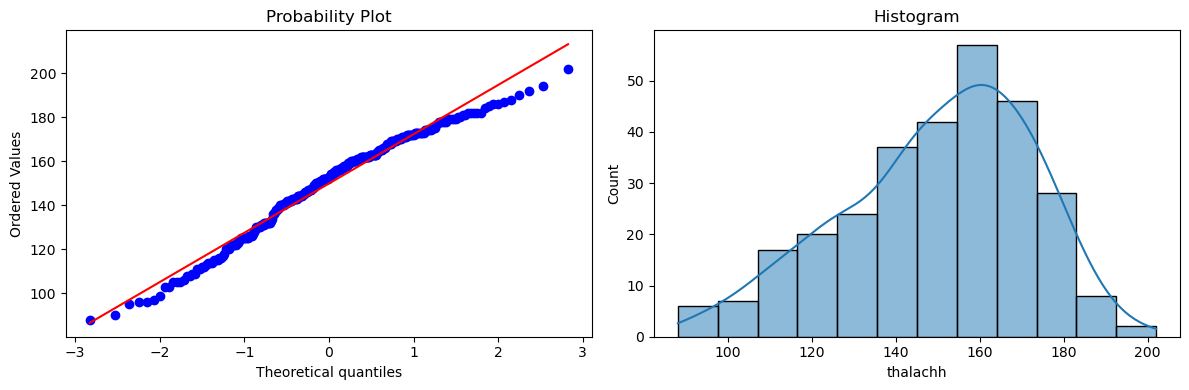

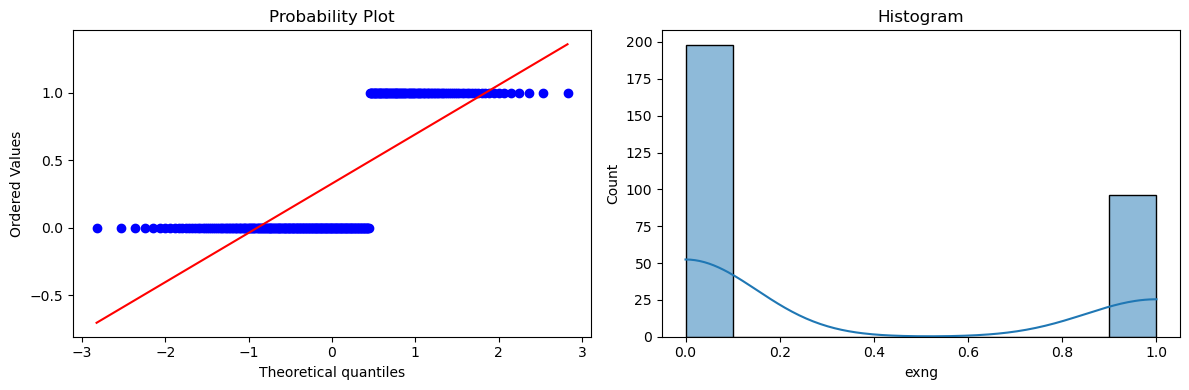

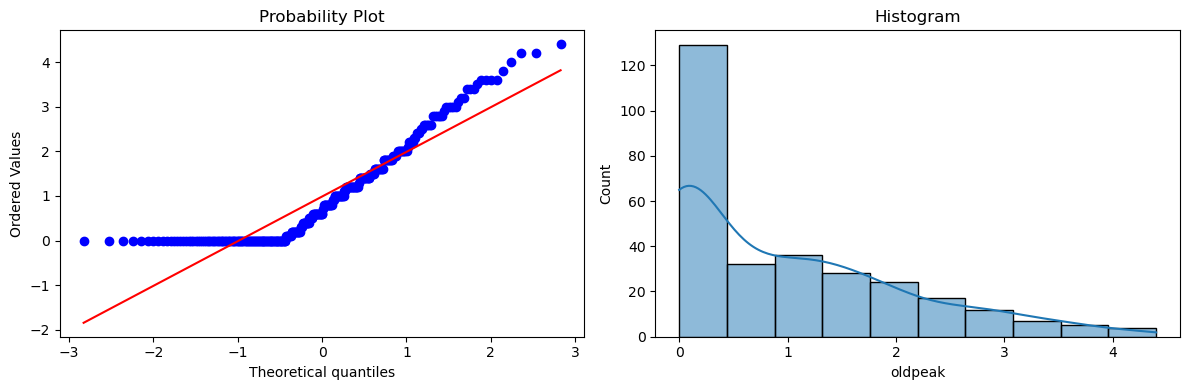

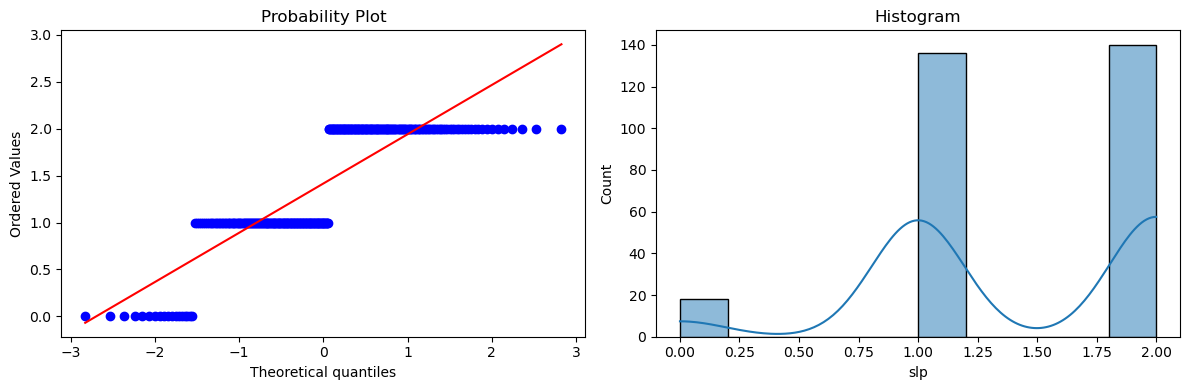

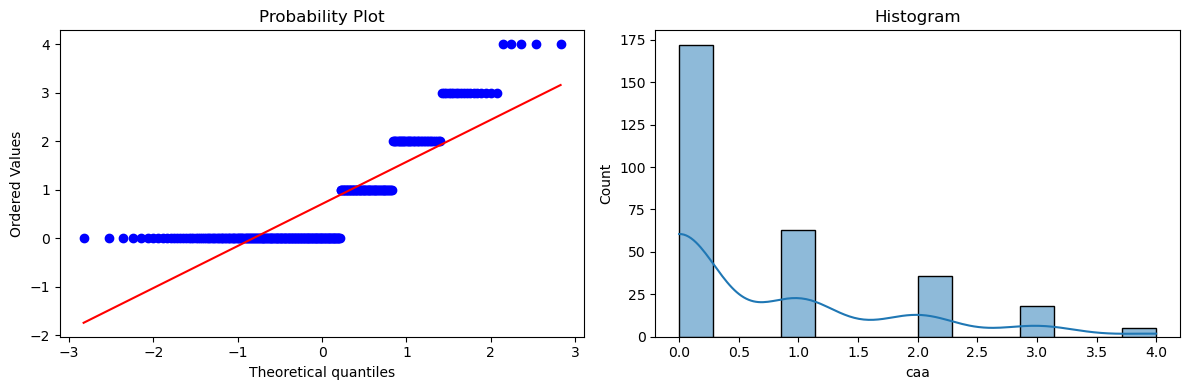

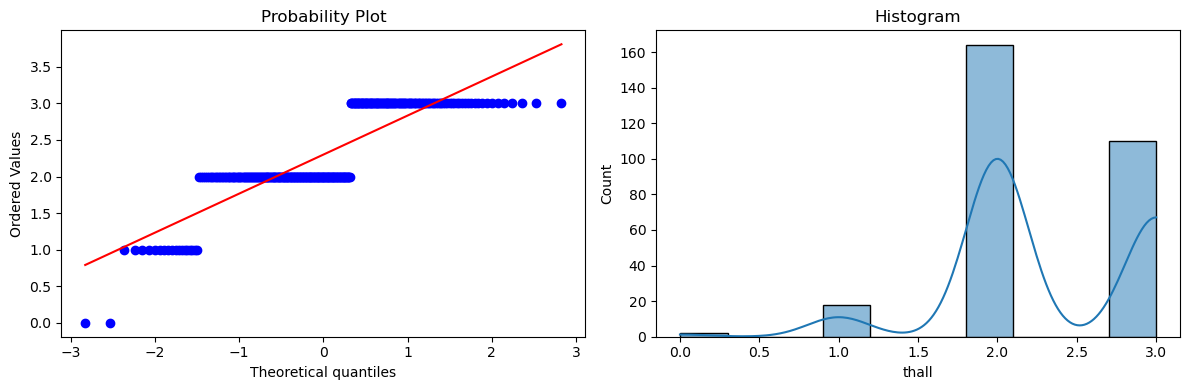

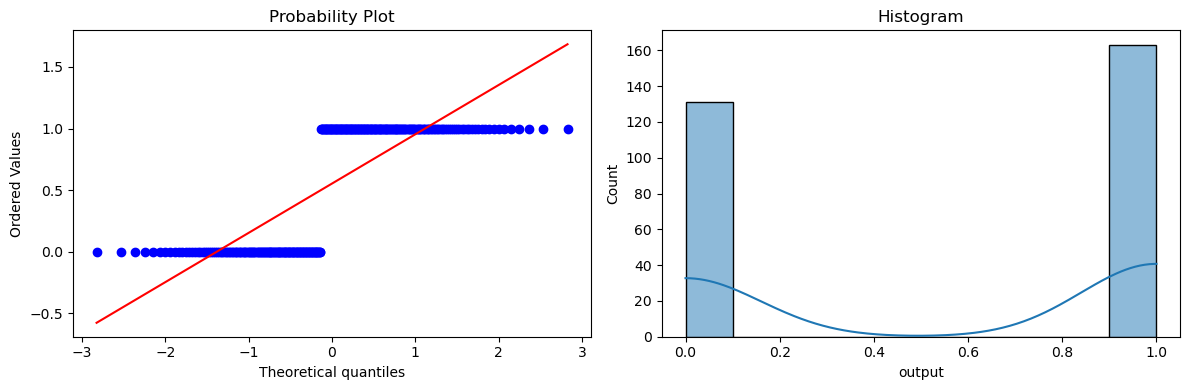

In [18]:
for column in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].set_title('QQ Plot')
    stats.probplot(df[column], dist='norm', plot=axes[0])
    axes[1].set_title('Histogram')
    sns.histplot(df[column], kde=True, ax=axes[1])

    plt.tight_layout()
    plt.show()

Veient els resultats del QQ plot i dels histogrames, podríem pensar que en algun atribut hi pot haver una distribució normal. Anem a comprovar-ho:

Anem a veure, segons el test de Shapiro-Wilk, si els atributs estan normalitzats:

In [19]:
shapiro_results = df.apply(lambda column: stats.shapiro(column))

for column, result in shapiro_results.items():
    print(f"Columna '{column}':")
    print(f" - Test statistic: {result[0]}") 
    print(f" - p-value: {result[1]}") 
    if result[1] > 0.05:
        print(" - Té una distribució normal")
    else:
        print(" - No té una distribució normal")
    print() 

Columna 'age':
 - Test statistic: 0.9871347546577454
 - p-value: 0.010102322325110435
 - No té una distribució normal

Columna 'sex':
 - Test statistic: 0.5793328285217285
 - p-value: 4.2969832827115785e-26
 - No té una distribució normal

Columna 'cp':
 - Test statistic: 0.7931687831878662
 - p-value: 4.976597221587868e-19
 - No té una distribució normal

Columna 'trtbps':
 - Test statistic: 0.9734498858451843
 - p-value: 2.8910419132444076e-05
 - No té una distribució normal

Columna 'chol':
 - Test statistic: 0.9927777647972107
 - p-value: 0.16637951135635376
 - Té una distribució normal

Columna 'fbs':
 - Test statistic: 0.4206662178039551
 - p-value: 1.1450487838252557e-29
 - No té una distribució normal

Columna 'restecg':
 - Test statistic: 0.6802893280982971
 - p-value: 3.198512901954218e-23
 - No té una distribució normal

Columna 'thalachh':
 - Test statistic: 0.975179135799408
 - p-value: 5.5865039030322805e-05
 - No té una distribució normal

Columna 'exng':
 - Test statist

Es pot veure als resultats que els atributs no tenen una distribució normal, ja que el p-value és inferior al 0.05, per tant, es rebutja la hipòtesi nul·la i s'afirma que no és normal. Tot i així, pel teorema central del límit, si hi ha més de 30 elements, condició que es compleix, es pot afirmar que es pot aproximar a una distribució normal de mitjana 0 i desviació estàndard 1.

## Predicció de la variable objectiu

Es fan servir dos mètodes d'aprenentatge supervisat com són la regressió lineal i la regressió logística i un mètode d'aprenentatge automàtic no supervisat com és K-means.

#### Regressió lineal

In [20]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [21]:
threshold = 0.5
y_pred_class = np.where(y_pred >= threshold, 1, 0)
accuracy = accuracy_score(y_test, y_pred_class)
cm = confusion_matrix(y_test, y_pred_class)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.847457627118644
Confusion Matrix:
[[17  8]
 [ 1 33]]


In [22]:
# S'afegeix la predicció al set de test
'''X_test_predicted = X_test.copy()
X_test_predicted['output'] = y_pred_class
X_test_predicted.head()'''

"X_test_predicted = X_test.copy()\nX_test_predicted['output'] = y_pred_class\nX_test_predicted.head()"

#### Regressió logística

In [23]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

/home/pau/anaconda3/envs/uoc20221pec1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
threshold = 0.5
y_pred_class = np.where(y_pred >= threshold, 1, 0)
accuracy = accuracy_score(y_test, y_pred_class)
cm = confusion_matrix(y_test, y_pred_class)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.847457627118644
Confusion Matrix:
[[17  8]
 [ 1 33]]


#### K means

In [25]:
kmeans = KMeans(n_clusters=2, random_state=random_state).fit(X.values)
centroids = kmeans.cluster_centers_

In [26]:
predicted_kmeans = kmeans.predict(X.values)

In [27]:
accuracy = accuracy_score(y, predicted_kmeans)
cm = confusion_matrix(y, predicted_kmeans)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.5918367346938775
Confusion Matrix:
[[ 65  66]
 [ 54 109]]


<a id="apt6"></a>

## 6 Resolució del problema